# Estimation of mean of a population from a sample

In this note, I am going to explore the effect of sample size on the estimation, confidence interval, significance value and bias by analyzing the mean estimation problem from a sample. 

Below, I am going to create a population of size 10,000 by drawing samples from a Gaussian distribution. Then I will experiment with small random samples from this artificially created population.

## Population of Gaussian Variables

In [12]:
# import essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# generate population
def generate_gaussian_population(true_mean,true_std,population_size):
    population = np.random.normal(true_mean,true_std,population_size)
    population = pd.Series(data=population)
    return population

In [14]:
true_std = 300.0
true_mean = 1200.0
population_size = 10000
population = generate_gaussian_population(true_mean,true_std,population_size)
population_mean = np.mean(population)
population_std = np.std(population)
print("Population mean = %0.2f\n Population std = %0.2f" % (population_mean,population_std))

Population mean = 1199.45
 Population std = 299.38


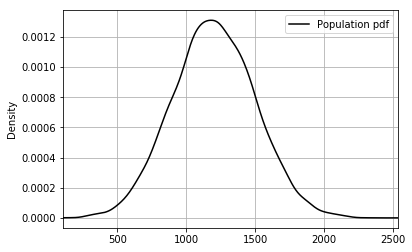

In [15]:
fig,ax = plt.subplots()
population.plot.kde(ax=ax,label='Population pdf',color='black')
plt.legend(loc='best')
plt.xlim(np.min(population),np.max(population))
plt.grid()
plt.title("Population pdf")

In [16]:
# generate samples
def sample_from_population(population,sample_size,n_samples):
    samples = np.empty((sample_size,n_samples))
    for i in range(n_samples):
        samples[:,i] = np.random.choice(population,sample_size,replace=False)    
    sample_names = ['Sample '+(str(i+1)) for i in range(n_samples)]    
    samples = pd.DataFrame(samples,columns=sample_names)
    return samples

In [17]:
sample_size = 10
n_samples = 100
samples = sample_from_population(population,sample_size,n_samples)

In [28]:
sample_means = samples.mean(axis=0)
print(sample_means.head())

Sample 1    1096.394414
Sample 2    1177.318224
Sample 3    1215.852321
Sample 4    1185.485768
Sample 5    1137.644540
dtype: float64


Text(0.5,1,'Population & Sample pdfs')

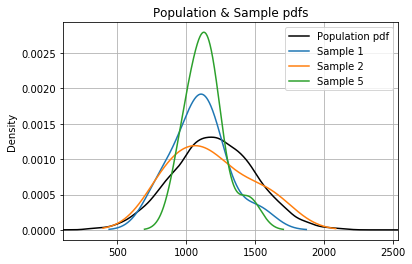

In [30]:
# Plot histogram
fig,ax = plt.subplots()
population.plot.kde(ax=ax, color='black',label='Population pdf')
samples[['Sample 1','Sample 2','Sample 5']].plot.kde(ax=ax)
#samples['Sample 1'].plot.hist(ax=ax,density=True)
plt.xlim(min(population),max(population))
plt.legend(loc='best')
plt.grid()
plt.title("Population & Sample pdfs")

Text(0.5,1,'Population pdf & Sample means pdf')

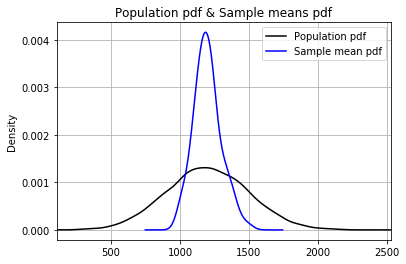

In [32]:
fig,ax = plt.subplots()
population.plot.kde(ax=ax, color='black',label='Population pdf')
sample_means.plot.kde(ax=ax, color='blue',label='Sample mean pdf')
ax.legend(loc='best')
plt.xlim(np.min(population),np.max(population))
ax.grid()
plt.title("Population pdf & Sample means pdf")

Text(0.5,1,'Sample means pdf')

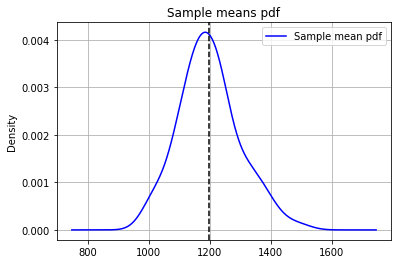

In [33]:
fig,ax = plt.subplots()
sample_means.plot.kde(ax=ax, color='blue',label='Sample mean pdf')
ax.axvline(x=np.mean(sample_means),color='black',linestyle='dashed')
ax.legend(loc='upper right')
ax.grid()
plt.title("Sample means pdf")

In [22]:
print('Population mean = %0.2f' % (population_mean))
print('Population std = %0.2f' % (population_std))
print('Theoretical mean of sample means = %0.2f' % population_mean)
print('Estimated mean of sample means = %0.2f' % (np.mean(sample_means)))
print('Theoretical std of sample means = %0.2f' % (population_std/np.sqrt(sample_size)))
print('Estimated std of sample means = %0.2f' % (np.std(sample_means)))

Population mean = 1199.45
Population std = 299.38
Theoretical mean of sample means = 1199.45
Estimated mean of sample means = 1198.44
Theoretical std of sample means = 94.67
Estimated std of sample means = 98.30
